<a href="https://colab.research.google.com/github/NiEl0503/simulador4/blob/main/Simulador4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simulator Télos - Nível 4 Trilha de Dados**


**Contextualização**

Aprendemos que a análise de dados oferece insights valiosos para a
tomada de decisões, e que coletar e tratar os dados corretamente é
fundamental para que possamos elaborar os KPIs.


### Desafio 1 - Raspagem de dados IMDB


a) Faça a raspagem da URL https://www.imdb.com/chart/top/

In [ ]:
# Robots.txt
import requests

url = 'https://www.imdb.com/robots.txt'

try:
  answer = requests.get(url)
  answer.raise_for_status()

  robots = answer.text
  print(robots)

except requests.exceptions.RequestException as e:
  print(f"Erro de acesso {url}: {e}")

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil

In [ ]:
# Raspado de dados
from requests.exceptions import HTTPError

contenido = None
URL = 'https://www.imdb.com/chart/top/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

try:
  response = requests.get(URL, headers=headers)
  response.raise_for_status()
  contents = response.content

except HTTPError as http_err:
  print(f"Ocurrio u error HTTP: {http_err}")
except Exception as err:
  print(f"Ocurrio un error: {err}")

if contents is not None:
  print("Conteúdo da página baixado com sucesso")
else:
  print("Erro ao baixar o conteúdo da página")

Conteúdo da página baixado com sucesso


b) Extraia o 25 primeiro filmes e crie um DataFrame no pandas com as
colunas: 'Título', 'Ano', 'Duração', 'Nota', 'Classificação Indicativa'

In [ ]:
# BeautifulSoup
from bs4 import BeautifulSoup

content_html = contents

page = BeautifulSoup(content_html, 'html.parser')

print("HTML carregado com sucesso usando BeautifulSoup")

HTML carregado com sucesso usando BeautifulSoup


In [ ]:
import pandas as pd

list_movies = []

titles = page.find_all('a', class_='ipc-title-link-wrapper')

for title in titles:
    name_filme = title.get_text(strip=True)

    father = title.find_parent('div', class_='ipc-metadata-list-summary-item__c')

    info_details = father.find_all('span', class_='cli-title-metadata-item')

    if info_details and len(info_details) >= 3:
        year = info_details[0].get_text(strip=True)
        duration = info_details[1].get_text(strip=True)
        classification = info_details[2].get_text(strip=True)
    else:
        year = None
        duration = None
        classification = None

    rating_details = father.find_all('span', class_='ipc-rating-star--rating')
    ratings = [rating_span.get_text(strip=True) for rating_span in rating_details]

    movie_info = {
        'Title': name_filme,
        'Year': year,
        'Duration': duration,
        'Clasification': classification,
        'Note': ', '.join(ratings) if ratings else None
    }

    list_movies.append(movie_info)


In [ ]:
df_movies = pd.DataFrame(list_movies)

if not df_movies.empty:
    print("Dataframe criado com sucesso")
else:
    print("Falha ao criar dataframe")

Dataframe criado com sucesso


In [ ]:
df_movies.head(25)

,Title,Year,Duration,Clasification,Note
0,1. The Shawshank Redemption,1994,2h 22m,R,9.3
1,2. The Godfather,1972,2h 55m,R,9.2
2,3. The Dark Knight,2008,2h 32m,PG-13,9.0
3,4. The Godfather Part II,1974,3h 22m,R,9.0
4,5. 12 Angry Men,1957,1h 36m,Approved,9.0
5,6. Schindler's List,1993,3h 15m,R,9.0
6,7. The Lord of the Rings: The Return of the King,2003,3h 21m,PG-13,9.0
7,8. Pulp Fiction,1994,2h 34m,R,8.9
8,9. The Lord of the Rings: The Fellowship of th...,2001,2h 58m,PG-13,8.9
9,"10. The Good, the Bad and the Ugly",1966,2h 58m,R,8.8


In [ ]:
# baixar o arquivo como csv
df_movies.to_csv('data.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

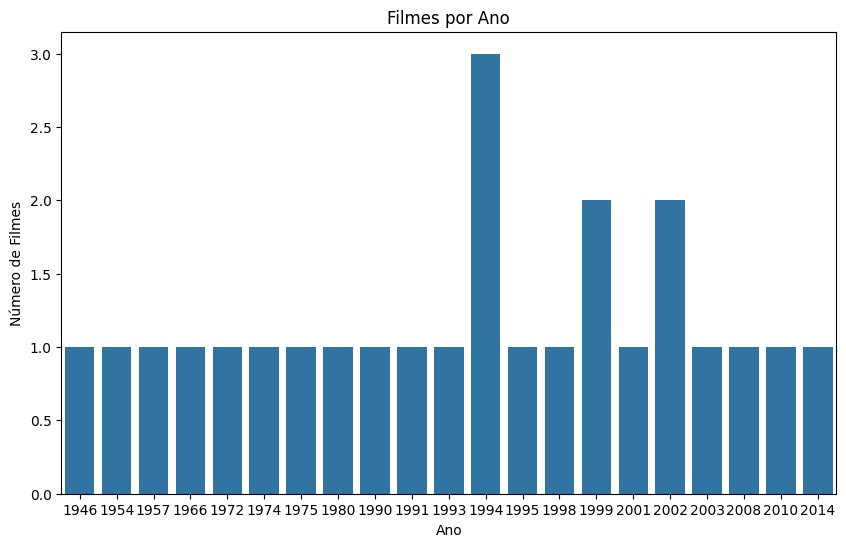

In [ ]:
# Filmes por Ano

filmes_por_ano = df_movies.groupby('Year')['Title'].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Title', data=filmes_por_ano)
plt.title('Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.show()

**Na análise da distribuição dos filmes exibidos por ano, observa-se uma tendência predominante em que a maioria dos anos apresenta a projeção de um único filme. Contudo, identificam-se exceções notáveis: em 1999 e 2002, foram exibidos dois filmes, enquanto o ano de 1994 se destaca por registrar o maior número de lançamentos, com um total de três filmes.**

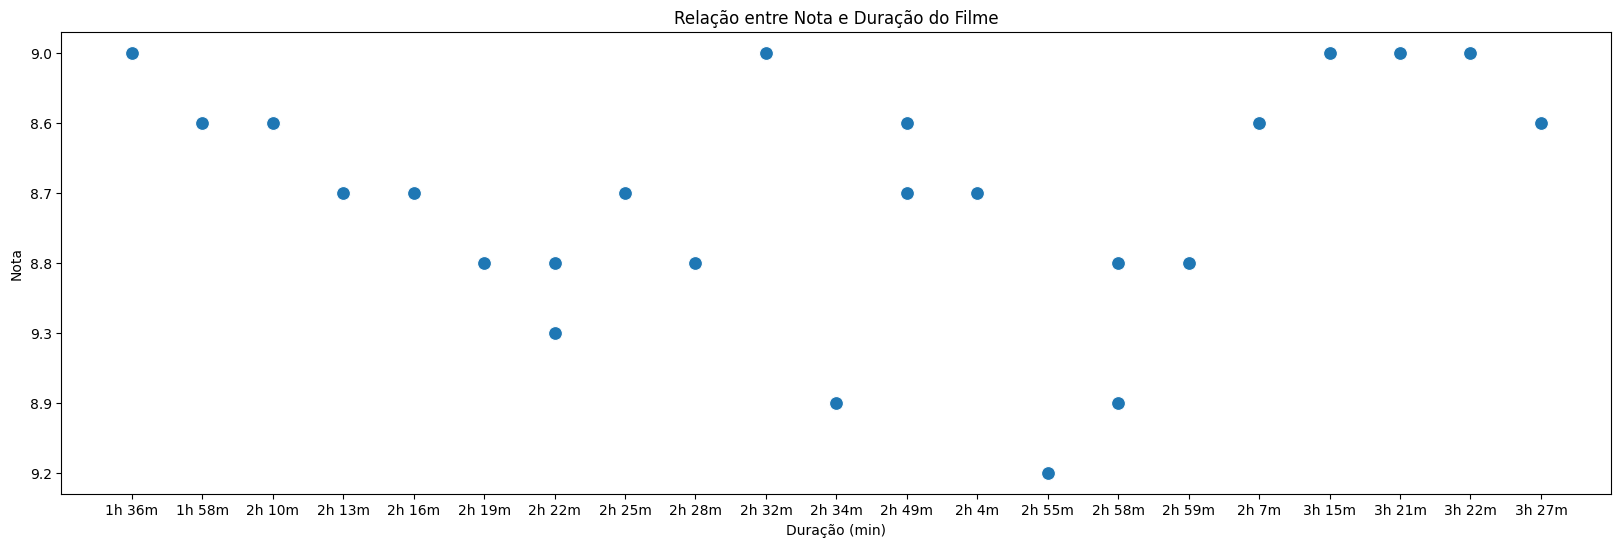

In [ ]:
# Relação entre Nota e Duração do Filme

df_movies_sorted = df_movies.sort_values('Duration')

plt.figure(figsize=(20,6))
sns.scatterplot(x='Duration', y='Note', data=df_movies_sorted, s=100)
plt.title('Relação entre Nota e Duração do Filme')
plt.xlabel('Duração (min)')
plt.ylabel('Nota')
plt.show()



**Não parece haver uma relação clara ou linear entre a duração dos filmes e as suas notas.**

**A ausência de uma relação clara indica que a duração de um filme não parece ser um fator determinante para a nota que recebe, ou seja, tanto curtas quanto longas-metragens podem obter boas avaliações, e vice-versa.**

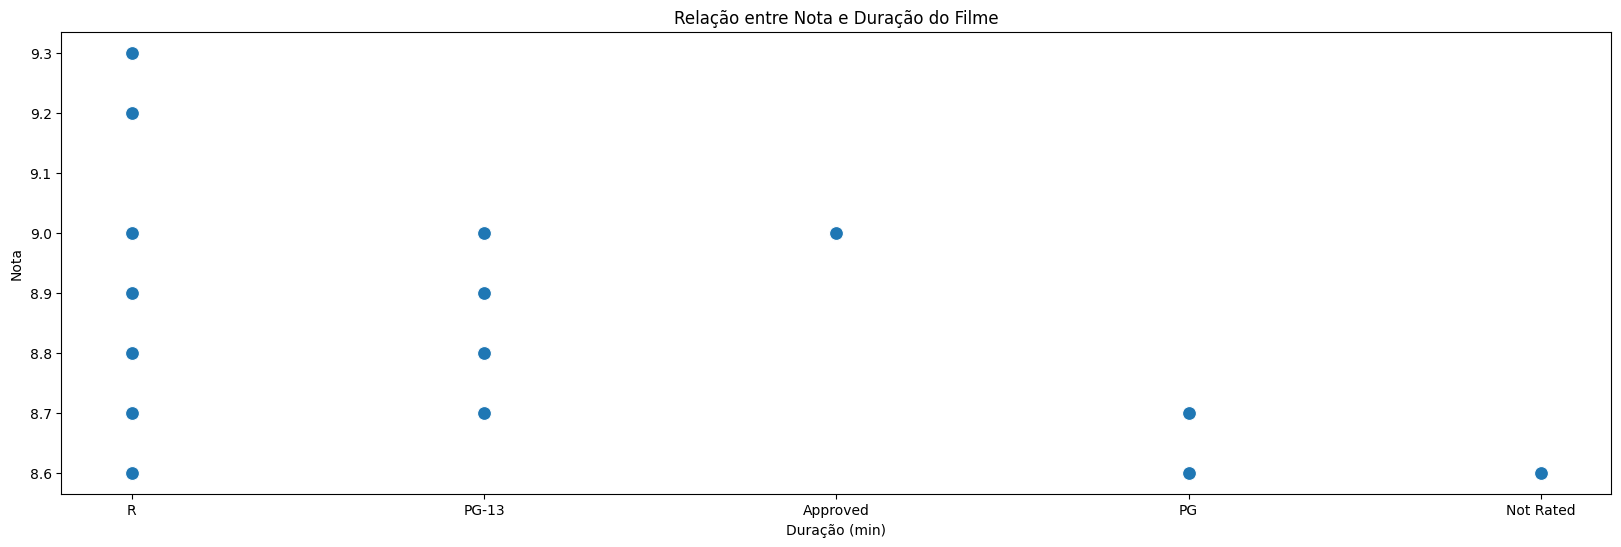

In [ ]:
# Relação entre Nota e Classificação Indicativa

plt.figure(figsize=(20,6))
sns.scatterplot(x='Clasification', y='Note', data=df_movies, s=100)
plt.title('Relação entre Nota e Duração do Filme')
plt.xlabel('Duração (min)')
plt.ylabel('Nota')
plt.show()


**R (Restrito):** Restrito, para maiores de 17 anos.

**PG-13:** Orientação parental sugerida, não recomendada para menores de 13 anos.

**Approved:** Aprovado, sem restrições (geralmente se aplica a filmes mais antigos).

**PG (Orientação Parental):** Orientação parental recomendada, mas adequada para crianças.

**Not Rated (Não avaliado):** Sem classificação.

**Não parece haver uma relação clara entre a classificação etária e as classificações dos filmes neste conjunto de dados.**

**Os filmes com classificação R e PG-13 abrangem todo o espectro de notas, sugerindo que tanto os filmes restritos quanto os PG-13 podem receber notas altas e moderadas.**

**Filmes não avaliados e aprovados parecem ter tendência a obter classificações um pouco mais baixas em comparação com outras classificações.**

**Os dados sobre filmes com classificação PG são insuficientes para fazer uma avaliação sólida, mas os poucos que aparecem têm notas moderadas.**

### Desafio 2 - KPIs com a base da NBA

Você é o Analista de dados do presidente do time ‘Sacramento Kings’
Com a base de dados dos jogadores da NBA, crie KPIs que possam ser
relevantes

In [1]:
import pandas as pd

df_nba = pd.read_csv('/content/Simulador_Nivel_4_nba2k20_full_632902088d.csv')

In [ ]:
df_nba

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,NaN


In [2]:
# Transformando as colunas de peso e altura

def extract_after_slash(value):
    if '/' in value:
        return value.split('/')[1].strip()
    return value.strip()

def clean_and_convert(value):
    value = value.replace('m', '').replace('cm', '').replace('kg.', '').replace('lbs.', '').strip()
    try:
        return float(value)
    except ValueError:
        return None

df_nba['height'] = df_nba['height'].apply(extract_after_slash)
df_nba['weight'] = df_nba['weight'].apply(extract_after_slash)

df_nba['height'] = df_nba['height'].apply(clean_and_convert)
df_nba['weight'] = df_nba['weight'].apply(clean_and_convert)

df_nba


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,2.06,113.4,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,2.01,102.1,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,2.11,109.8,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,2.08,104.3,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,1.96,99.8,$38199000,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,1.83,81.6,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,1.91,90.7,$79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,2.08,90.7,$79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,1.91,86.2,$898310,USA,2019,Undrafted,Undrafted,NaN


In [3]:
# definindo as colunas numericas
colunas_numericas = ['jersey', 'salary']


# Removendo os caracteres especiais das colunas numéricas usando apply e lambda
df_nba[colunas_numericas] = df_nba[colunas_numericas].apply(
    lambda x: x.str.replace(r'[\$#]', '', regex=True).str.replace(',', '').astype(int)
)

df_nba

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,23,Los Angeles Lakers,F,12/30/84,2.06,113.4,37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,06/29/91,2.01,102.1,32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,12/06/94,2.11,109.8,25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,7,Brooklyn Nets,F,09/29/88,2.08,104.3,37199000,USA,2007,1,2,Texas
4,James Harden,96,13,Houston Rockets,G,08/26/89,1.96,99.8,38199000,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,0,Atlanta Hawks,G,10/02/95,1.83,81.6,522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,21,Houston Rockets,G,03/08/94,1.91,90.7,79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,37,Los Angeles Lakers,F,11/20/97,2.08,90.7,79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,0,Phoenix Suns,G,06/13/00,1.91,86.2,898310,USA,2019,Undrafted,Undrafted,NaN


In [4]:
# Transformando b_day em data
df_nba['b_day'] = pd.to_datetime(df_nba['b_day'])

<ipython-input-4-0be01114d104>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nba['b_day'] = pd.to_datetime(df_nba['b_day'])


In [ ]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    429 non-null    object        
 1   rating       429 non-null    int64         
 2   jersey       429 non-null    int64         
 3   team         406 non-null    object        
 4   position     429 non-null    object        
 5   b_day        429 non-null    datetime64[ns]
 6   height       429 non-null    float64       
 7   weight       429 non-null    float64       
 8   salary       429 non-null    int64         
 9   country      429 non-null    object        
 10  draft_year   429 non-null    int64         
 11  draft_round  429 non-null    object        
 12  draft_peak   429 non-null    object        
 13  college      363 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 47.0+ KB


In [ ]:
# Quantas linhas o NAN tem?

num_rows_with_nan = df_nba.isna().any(axis=1).sum()

print(f"Número de filas com pelo menos um NaN: {num_rows_with_nan}")

Número de filas com pelo menos um NaN: 85


In [5]:
# Remover filas com pelo menos um NaN em qualquer coluna
df1 = df_nba.dropna()
df1

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,32742000,USA,2011,1,15,San Diego State
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,2.08,104.3,37199000,USA,2007,1,2,Texas
4,James Harden,96,13,Houston Rockets,G,1989-08-26,1.96,99.8,38199000,USA,2009,1,3,Arizona State
5,Stephen Curry,95,30,Golden State Warriors,G,1988-03-14,1.91,83.9,40231758,USA,2009,1,7,Davidson
6,Anthony Davis,94,3,Los Angeles Lakers,F-C,1993-03-11,2.08,100.7,27093019,USA,2012,1,1,Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Jordan McRae,68,0,Detroit Pistons,G,1991-03-28,1.96,81.2,1254933,USA,2014,2,58,Tennessee
424,Brandon Goodwin,68,0,Atlanta Hawks,G,1995-10-02,1.83,81.6,522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,21,Houston Rockets,G,1994-03-08,1.91,90.7,79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,37,Los Angeles Lakers,F,1997-11-20,2.08,90.7,79568,Greece,2018,Undrafted,Undrafted,Dayton


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    344 non-null    object        
 1   rating       344 non-null    int64         
 2   jersey       344 non-null    int64         
 3   team         344 non-null    object        
 4   position     344 non-null    object        
 5   b_day        344 non-null    datetime64[ns]
 6   height       344 non-null    float64       
 7   weight       344 non-null    float64       
 8   salary       344 non-null    int64         
 9   country      344 non-null    object        
 10  draft_year   344 non-null    int64         
 11  draft_round  344 non-null    object        
 12  draft_peak   344 non-null    object        
 13  college      344 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 40.3+ KB


In [ ]:
# baixar o arquivo como csv
df1.to_csv('dataLimpa.csv')

**a) Salários**

• Boxplot de Salários

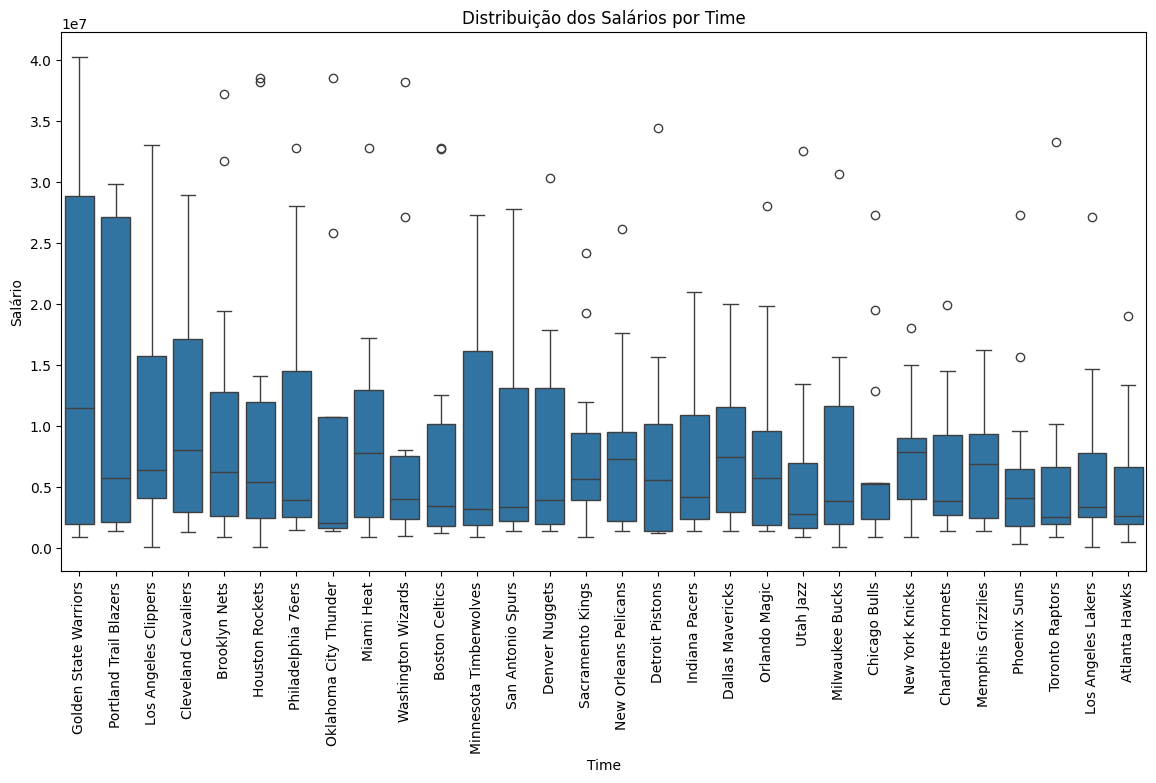

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_salaries = df1.groupby('team')['salary'].mean().reset_index()
mean_salaries = mean_salaries.sort_values(by='salary', ascending=False)
ordered_teams = mean_salaries['team'].tolist()

plt.figure(figsize=(14, 7))
sns.boxplot(x='team', y='salary', data=df1, order=ordered_teams)
plt.xticks(rotation=90)
plt.title('Distribuição dos Salários por Time')
plt.xlabel('Time')
plt.ylabel('Salário')
plt.show()

**O gráfico mostra uma disparidade salarial notável entre as equipes da NBA. Os Golden State Warriors e Portland Trail Blazers se destacam por possuírem uma estrutura salarial com grandes diferenças, o que indica a presença de craques com salários bem acima da média de seu time. Em contraste, equipas como o Charlotte Hornets e o Memphis Grizzlies apresentam uma distribuição salarial mais uniforme, sugerindo uma estratégia de investimento mais equilibrada sem depender tanto de jogadores com salários extremamente elevados.**

• Média de gastos com salário, do seu time e dos concorrentes

In [ ]:
salary_mean = df1.groupby('team')['salary'].mean()
salary_sorted = salary_mean.sort_values(ascending=False)
print('Média de Salários por Time:')
salary_sorted

Média de Salários por Time:


,salary
team,
Golden State Warriors,1.602847e+07
Portland Trail Blazers,1.246289e+07
Los Angeles Clippers,1.136294e+07
Cleveland Cavaliers,1.136291e+07
Brooklyn Nets,1.110316e+07
Houston Rockets,1.096353e+07
Philadelphia 76ers,1.047157e+07
Oklahoma City Thunder,9.711836e+06
Miami Heat,9.640210e+06


• Salário Máximo, Mínimo e Mediano

In [ ]:
salary_stats = df1['salary'].describe()
print('\nEstatísticas de Salário:')
salary_stats


Estatísticas de Salário:


,salary
count,3.440000e+02
mean,8.682386e+06
std,9.370934e+06
min,7.956800e+04
25%,2.028594e+06
50%,4.466723e+06
75%,1.223642e+07
max,4.023176e+07


**Salários**

**Máximo: 4.023176e+07**

**Mínimo: 7.956800e+04**

**Mediano: 8.682386e+06**

**b) Relação Salário x Outros Atributos**

• Gráfico de Dispersão Salário x Idade

In [ ]:
from datetime import datetime

def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year
    if (today.month, today.day) < (birth_date.month, birth_date.day):
        age -= 1
    return age


df1['age'] = df1['b_day'].apply(calculate_age)

df1

<ipython-input-25-211727ba7119>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['b_day'].apply(calculate_age)


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,32742000,USA,2011,1,15,San Diego State,33
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,2.08,104.3,37199000,USA,2007,1,2,Texas,35
4,James Harden,96,13,Houston Rockets,G,1989-08-26,1.96,99.8,38199000,USA,2009,1,3,Arizona State,35
5,Stephen Curry,95,30,Golden State Warriors,G,1988-03-14,1.91,83.9,40231758,USA,2009,1,7,Davidson,36
6,Anthony Davis,94,3,Los Angeles Lakers,F-C,1993-03-11,2.08,100.7,27093019,USA,2012,1,1,Kentucky,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Jordan McRae,68,0,Detroit Pistons,G,1991-03-28,1.96,81.2,1254933,USA,2014,2,58,Tennessee,33
424,Brandon Goodwin,68,0,Atlanta Hawks,G,1995-10-02,1.83,81.6,522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,28
425,Michael Frazier,68,21,Houston Rockets,G,1994-03-08,1.91,90.7,79568,USA,2015,2,60,Florida,30
426,Kostas Antetokounmpo,68,37,Los Angeles Lakers,F,1997-11-20,2.08,90.7,79568,Greece,2018,Undrafted,Undrafted,Dayton,26


Text(0, 0.5, 'Salário')

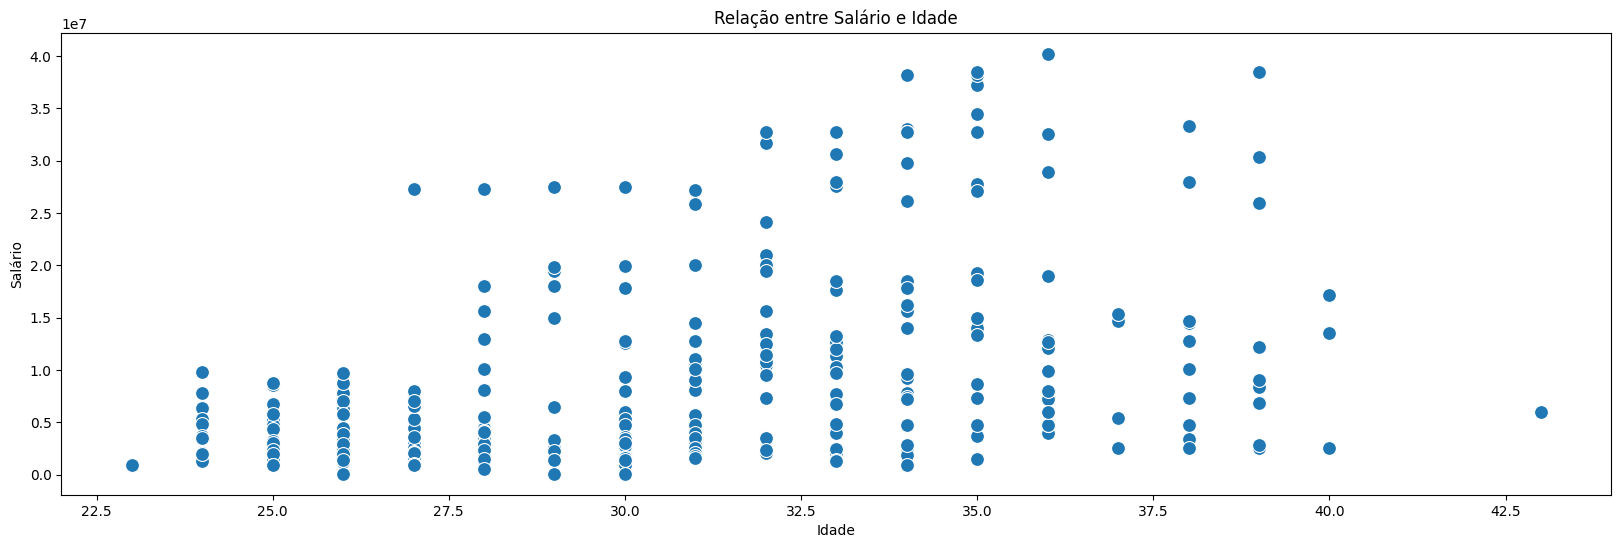

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='age', y='salary', data=df1, s=100)
plt.title('Relação entre Salário e Idade')
plt.xlabel('Idade')
plt.ylabel('Salário')

**Não parece haver uma relação linear clara entre salário e idade. Os pontos estão dispersos por vários níveis salariais para diferentes idades.**

*   Gráfico de Dispersão Salário x Altura/Peso

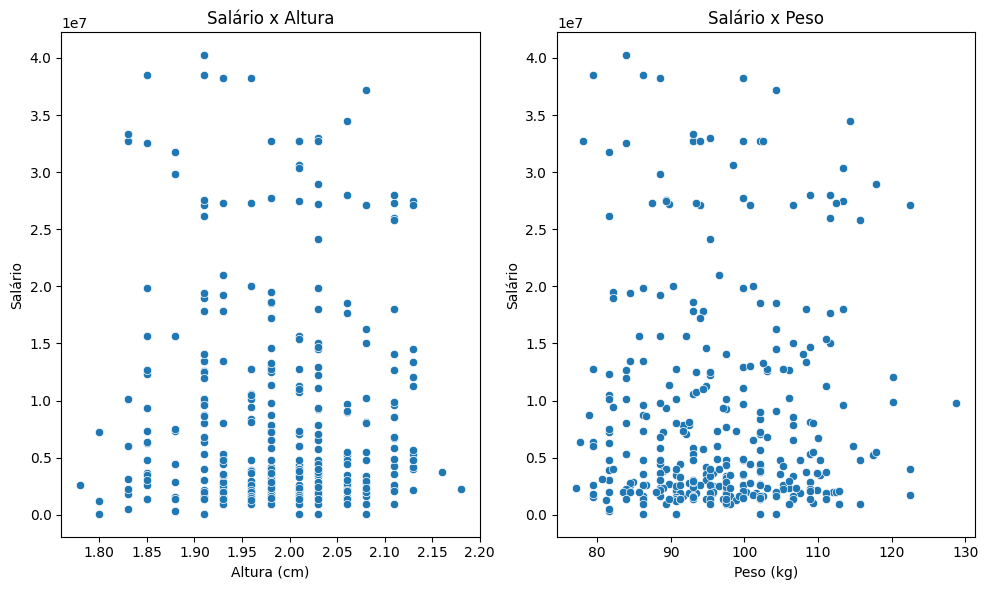

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='height', y='salary', data=df1)
plt.title('Salário x Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Salário')

plt.subplot(1, 2, 2)
sns.scatterplot(x='weight', y='salary', data=df1)
plt.title('Salário x Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Salário')

plt.tight_layout()
plt.show()


**Não parece haver uma relação linear clara entre salário e altura/peso. Os pontos estão dispersos por vários níveis salariais para diferentes altura/peso.**

**Observando os gráficos de dispersão, os salários estão distribuídos de maneira justa entre diferentes alturas e pesos, sem nenhum padrão óbvio sugerindo que jogadores mais altos ou mais pesados ​​ganhem mais. Os pontos estão espalhados por ambos os gráficos, indicando que factores como a altura ou o peso por si só não parecem ser determinantes claros dos salários dos jogadores.**

*   Gráfico de Barras Salário Médio por Posição

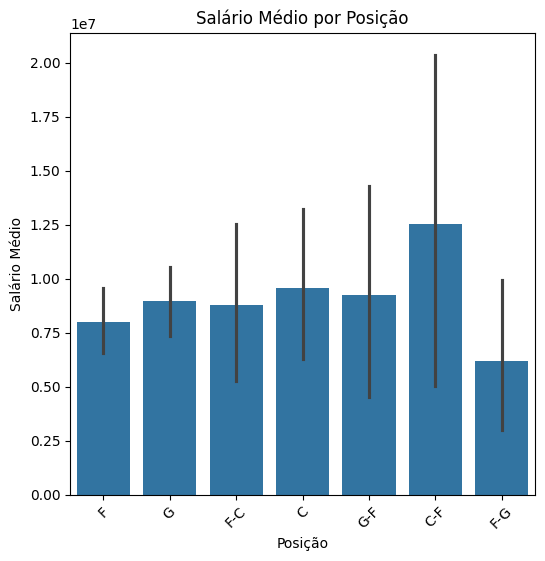

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='position', y='salary', data=df1, estimator='mean')
plt.title('Salário Médio por Posição')
plt.xlabel('Posição')
plt.ylabel('Salário Médio')
plt.xticks(rotation=45)
plt.show()


F (Forward)

G (Guard)

F-C (Forward-Center)

C (Center)

G-F (Guard-Forward)

C-F (Center-Forward)

F-G (Forward-Guard)


**A análise dos salários dos jogadores de basquete mostra que aqueles na posição de C-F (Center-Forward) têm o salário médio mais alto. As outras posições apresentam salários médios relativamente próximos entre si, indicando uma valorização mais equitativa. No entanto, os jogadores na posição de F-G (Forwards-Guard) recebem os salários medios mais baixos.**

• Gráfico de Barras Salário Médio por Time

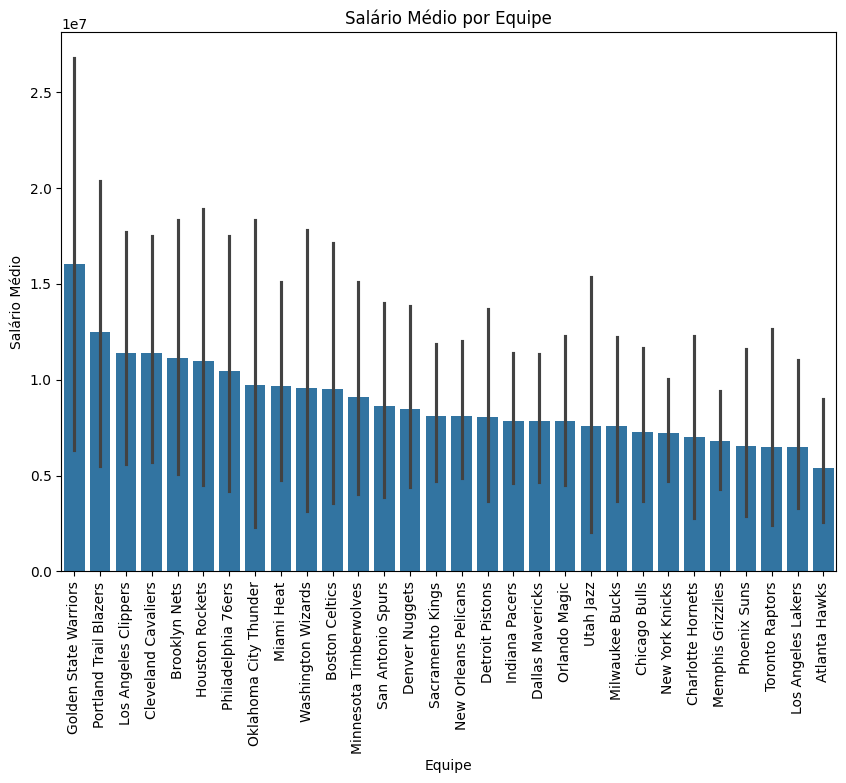

In [ ]:
salary_mean = df1.groupby('team')['salary'].mean().reset_index()
salary_mean = salary_mean.sort_values(by='salary', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x='team', y='salary', data=df1, estimator='mean', order=salary_mean['team'])
plt.title('Salário Médio por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Salário Médio')
plt.xticks(rotation=90)
plt.show()


**c) Performance dos Jogadores**

• Gráfico de Barras Média de Rating por Posição

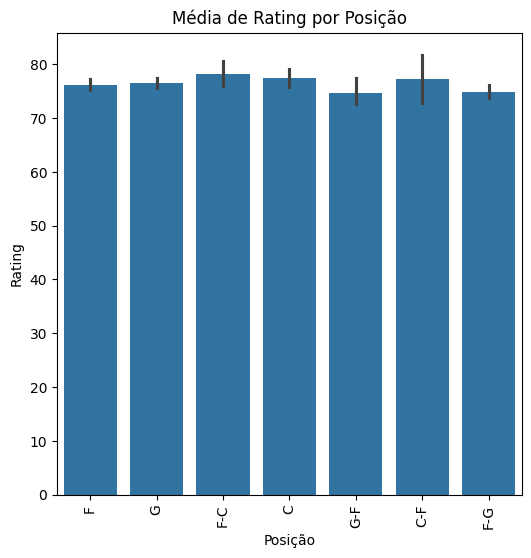

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='position', y='rating', data=df1, estimator='mean')
plt.title('Média de Rating por Posição')
plt.xlabel('Posição')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

• Gráfico de Dispersão Rating x Salário

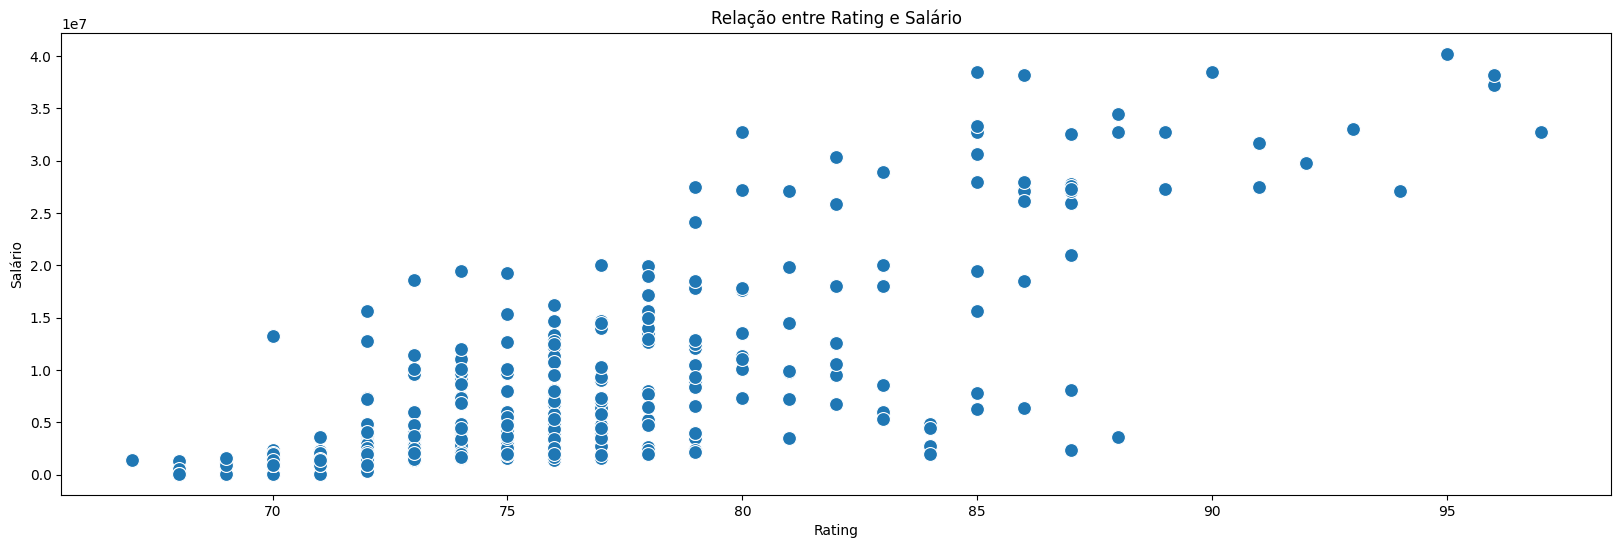

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='rating', y='salary', data=df1, s=100)
plt.title('Relação entre Rating e Salário')
plt.xlabel('Rating')
plt.ylabel('Salário')
plt.show()

**Neste gráfico vemos que quanto maior é o Rating, maiores serão os salários.**

**d) Comparação entre Times**

• Gráfico de Pizza Distribuição de Posições por Time

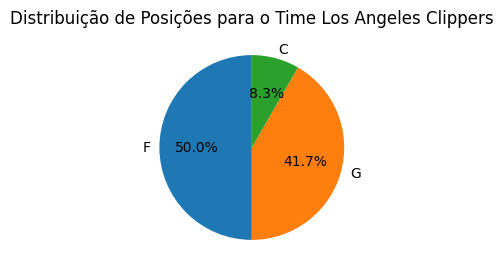

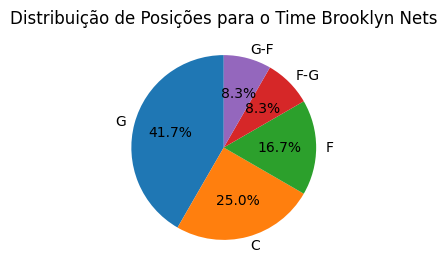

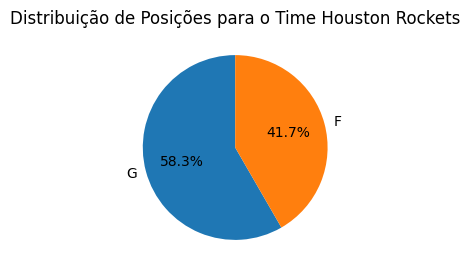

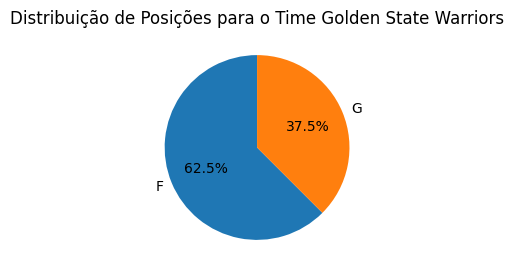

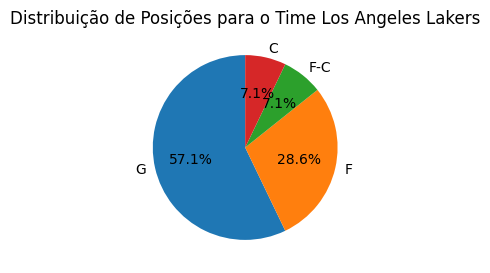

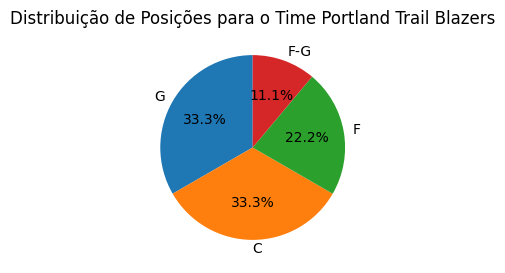

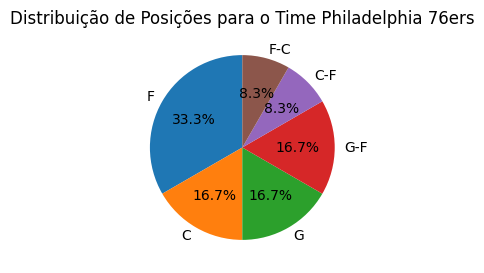

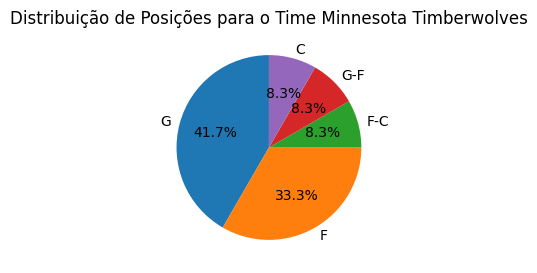

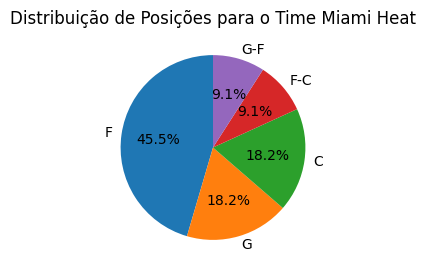

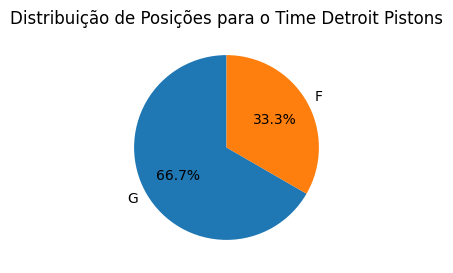

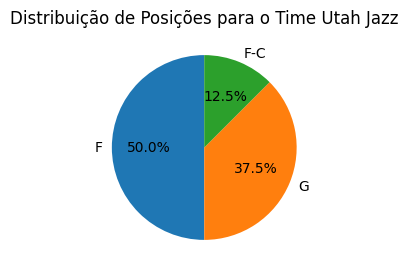

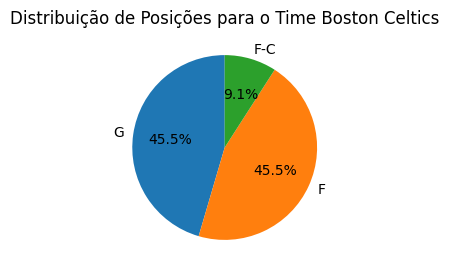

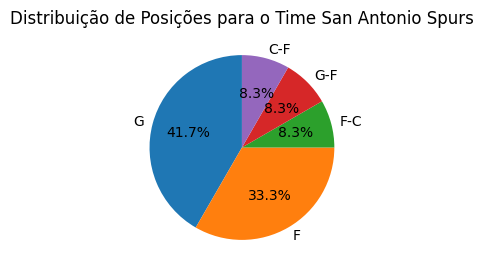

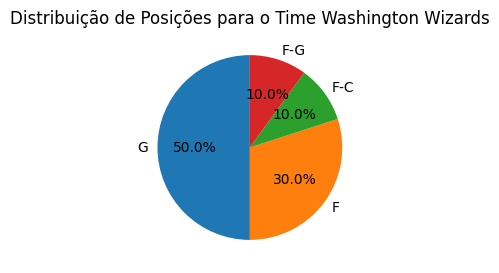

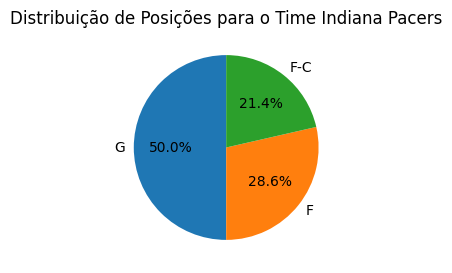

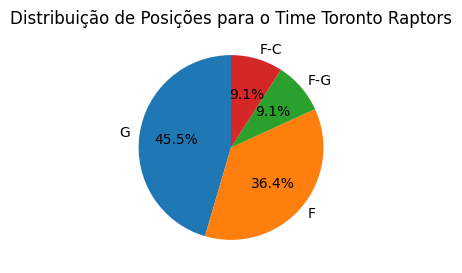

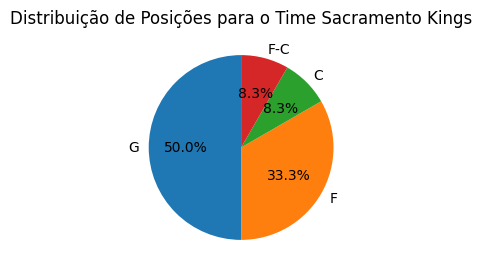

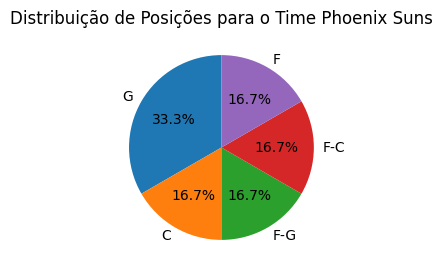

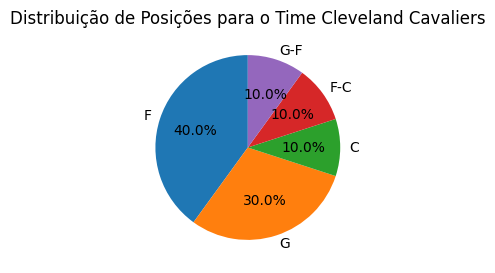

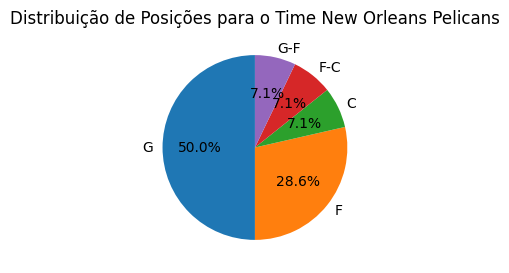

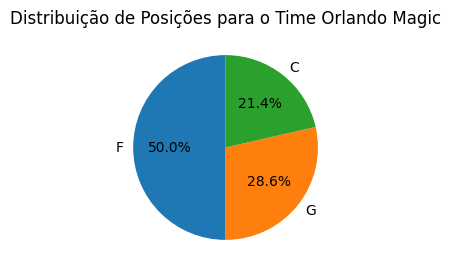

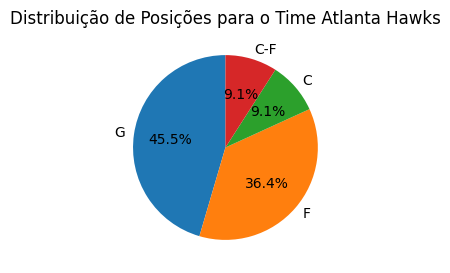

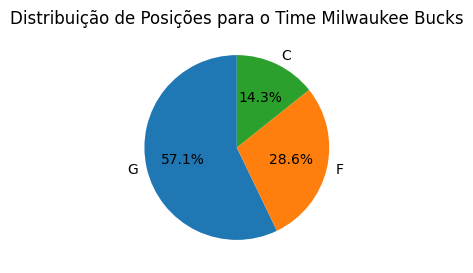

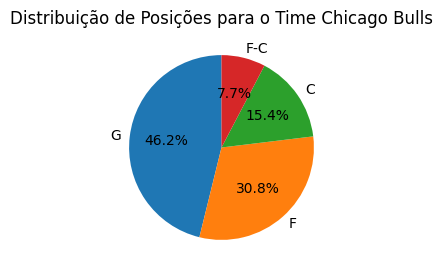

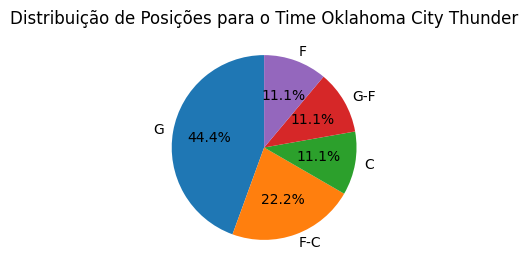

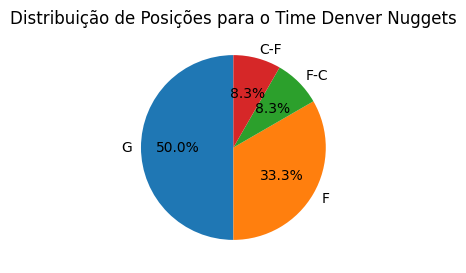

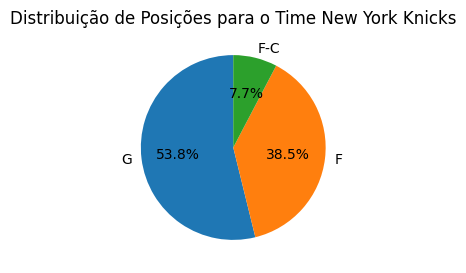

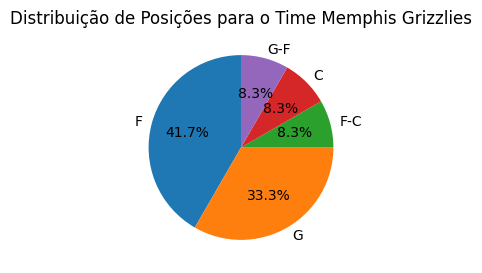

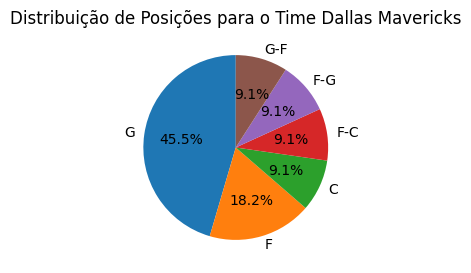

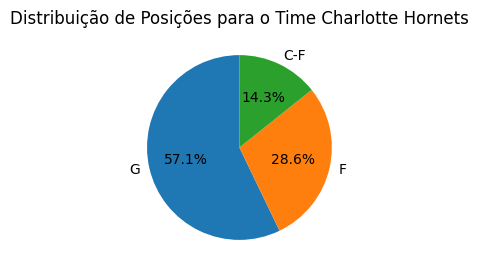

In [ ]:
teams = df1['team'].unique()

for team in teams:
    team_df = df1[df1['team'] == team]
    position_counts = team_df['position'].value_counts()

    plt.figure(figsize=(3, 3))
    plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribuição de Posições para o Time {team}')
    plt.show()

• Gráfico de Barras Total de Salários por Time

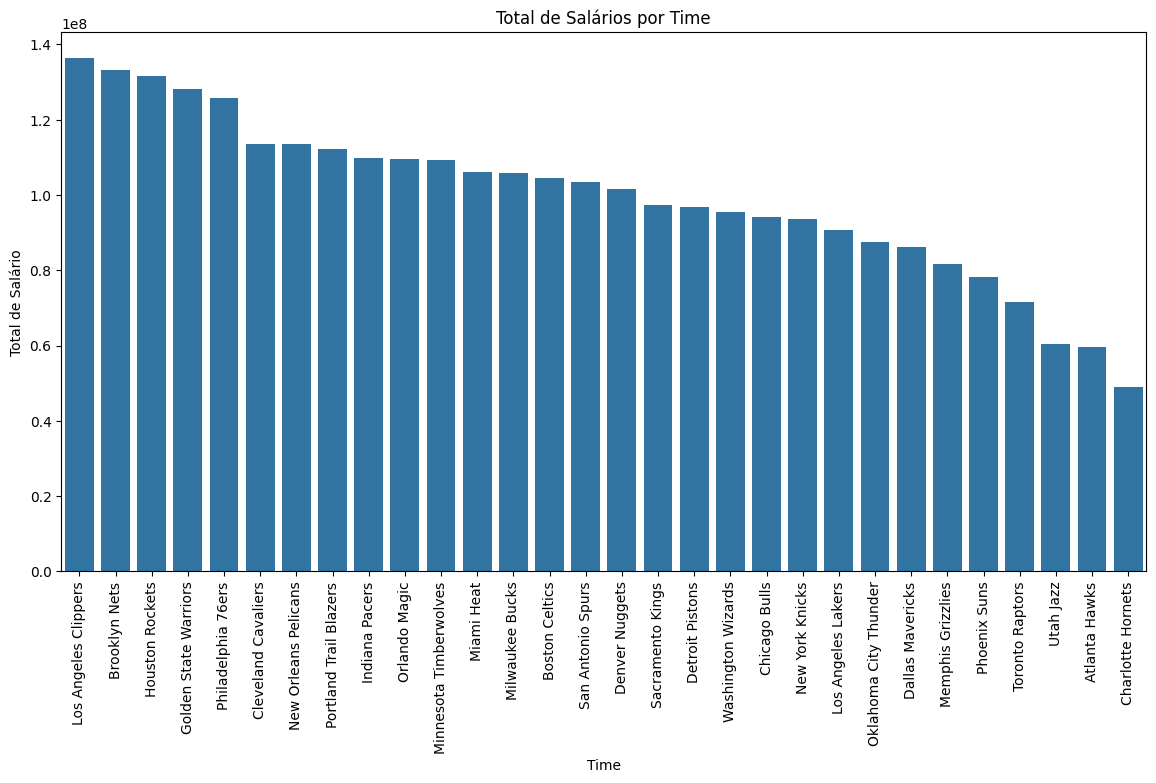

In [ ]:
total_salary = df1.groupby('team')['salary'].sum().reset_index()
total_sorted = total_salary.sort_values(by='salary', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='team', y='salary', data=total_sorted , estimator='sum')
plt.title('Total de Salários por Time')
plt.xlabel('Time')
plt.ylabel('Total de Salário')
plt.xticks(rotation=90)
plt.show()

• Gráfico de Colunas Rating por Time

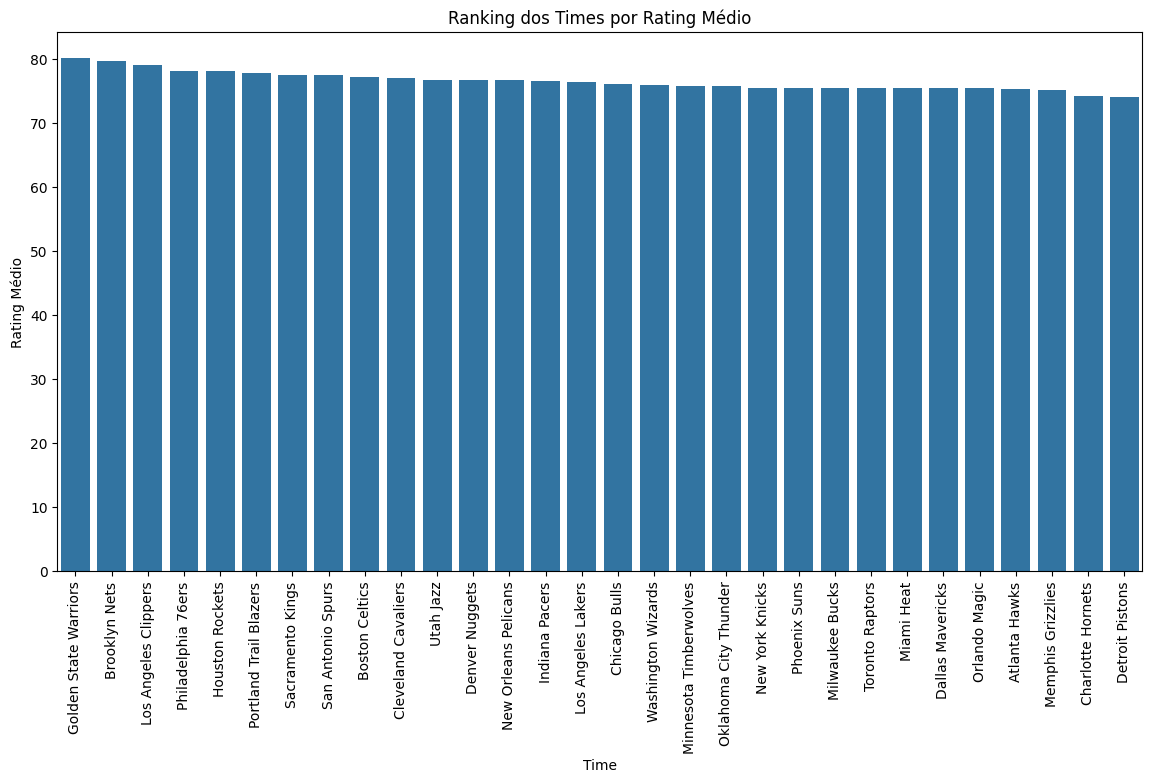

In [7]:
rating_time = df1.groupby('team')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='team', y='rating', data=rating_time)
plt.title('Ranking dos Times por Rating Médio')
plt.xlabel('Time')
plt.ylabel('Rating Médio')
plt.xticks(rotation=90)

plt.show()

## **Sacramento Kings**

In [8]:
kings_data = df1[df1['team'] == 'Sacramento Kings']
kings_data

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
31,De'Aaron Fox,86,5,Sacramento Kings,G,1997-12-20,1.91,77.6,6392760,USA,2017,1,5,Kentucky
50,Buddy Hield,84,24,Sacramento Kings,G,1993-12-17,1.93,96.2,4861207,The Bahamas,2016,1,6,Oklahoma
54,Marvin Bagley,83,35,Sacramento Kings,F,1999-03-14,2.11,106.6,8556120,USA,2018,1,2,Duke
94,Harrison Barnes,79,40,Sacramento Kings,F,1992-05-30,2.03,95.3,24147727,USA,2012,1,7,North Carolina
130,Jabari Parker,78,0,Sacramento Kings,F,1995-03-15,2.03,106.6,6500000,USA,2014,1,2,Duke
150,Alex Len,77,0,Sacramento Kings,C,1993-06-16,2.13,102.1,4160000,Ukraine,2013,1,5,Maryland
205,Kent Bazemore,75,26,Sacramento Kings,G,1989-07-01,1.93,88.5,19269663,USA,2012,Undrafted,Undrafted,Old Dominion
219,Richaun Holmes,75,22,Sacramento Kings,F,1993-10-15,2.08,110.2,4767000,USA,2015,2,37,Bowling Green
250,Yogi Ferrell,74,3,Sacramento Kings,G,1993-05-09,1.83,80.7,3150000,USA,2016,Undrafted,Undrafted,Indiana
252,Harry Giles,74,20,Sacramento Kings,F-C,1998-04-22,2.11,105.2,2578800,USA,2017,1,20,Duke


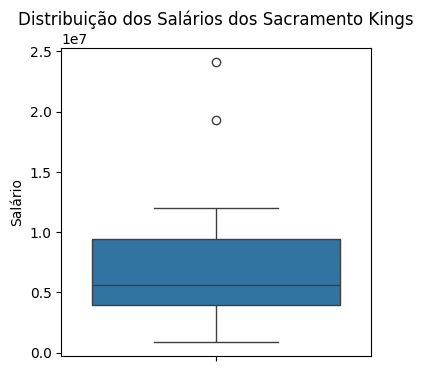

In [ ]:
# Boxplot de Salarios

plt.figure(figsize=(4, 4))
sns.boxplot(y='salary', data=kings_data)
plt.title('Distribuição dos Salários dos Sacramento Kings')
plt.ylabel('Salário')
plt.show()

**Média de salário:** 8.106799e+06

**Salário mínimo:** 8.983100e+05

**Salário máximo:** 2.414773e+07

**25%:** 	3.907500e+06

**50%:** 	5.626984e+06

**75%:** 	9.417090e+06

**2 outliers:** 24.147.727 e 19.269.663

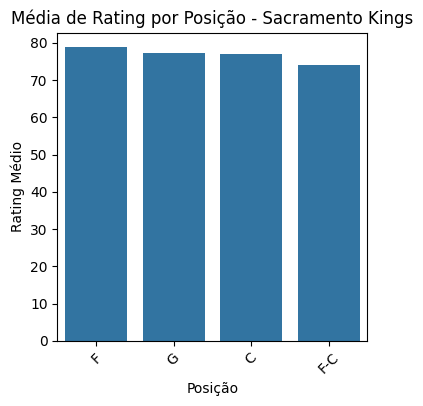

In [14]:
# Gráfico de Rating por Posição
rating_sort = kings_data.groupby('position')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(4, 4))
sns.barplot(x=rating_sort.index, y=rating_sort.values)
plt.title('Média de Rating por Posição - Sacramento Kings')
plt.xlabel('Posição')
plt.ylabel('Rating Médio')
plt.xticks(rotation=45)
plt.show()

**Dentro da equipe do Sacramento Kings, os jogadores que ocupam a posição F (Atacante) apresentam, em média, um desempenho (ou rating) um pouco superior em comparação com outras posições da equipe. Por outro lado, os jogadores classificados como F-C (Avançado-Centro) apresentam a classificação média mais baixa.**

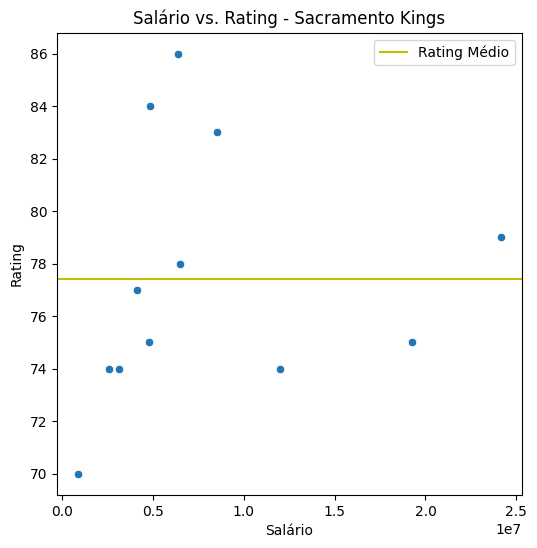

In [ ]:
# Gráfico de Salário vs. Rating

plt.figure(figsize=(6, 6))
sns.scatterplot(x='salary', y='rating', data=kings_data)
plt.title('Salário vs. Rating - Sacramento Kings')
plt.xlabel('Salário')
plt.ylabel('Rating')
plt.axhline(y=kings_data['rating'].mean(), color='y', label='Rating Médio')
plt.legend()
plt.show()

Rating

mean	77.416667

std	4.795042

min	70.000000

25%	74.000000

50%	76.000000

75%	80.000000

max	86.000000

**Não há relação entre rating e salário**

<ipython-input-18-be74c2f70f4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kings_data['age'] = (pd.to_datetime('today') - kings_data['b_day']).dt.days // 365


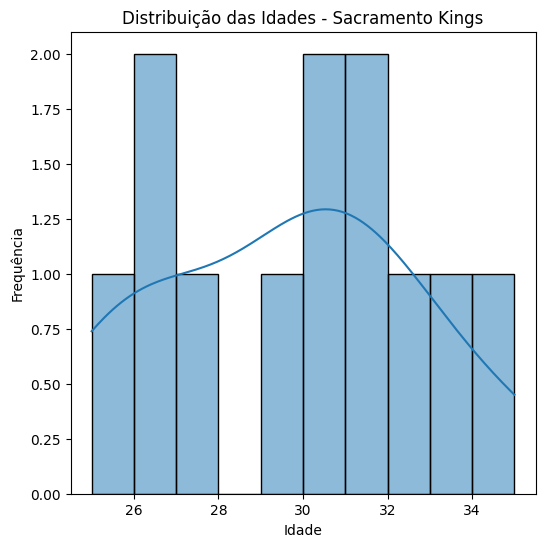

In [18]:
# Histograma de idades

kings_data['age'] = (pd.to_datetime('today') - kings_data['b_day']).dt.days // 365

plt.figure(figsize=(6, 6))
sns.histplot(kings_data['age'], bins=10, kde=True)
plt.title('Distribuição das Idades - Sacramento Kings')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

**No time Sacramento King os jogadores têm entre 25 e 35 anos.**


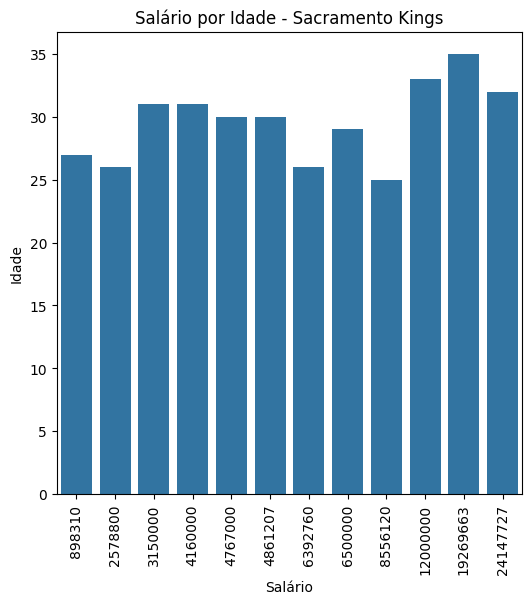

In [35]:
# Gráfico de Comparação de salários e Idades

plt.figure(figsize=(6, 6))
sns.barplot(x='salary', y='age', data=kings_data)

plt.title('Salário por Idade - Sacramento Kings')
plt.xlabel('Salário')
plt.ylabel('Idade')
plt.xticks(rotation=90)

plt.show()

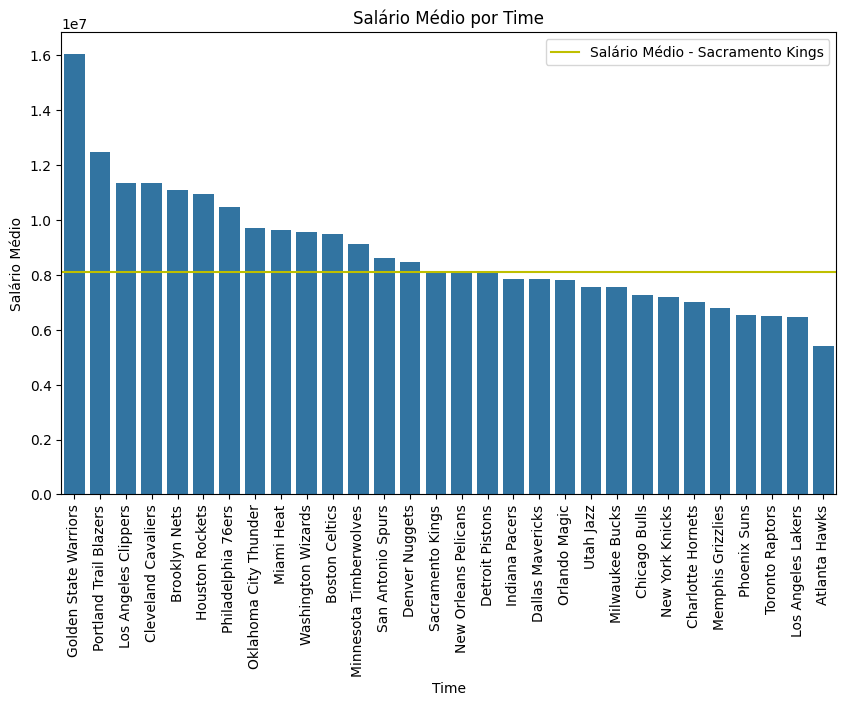

In [ ]:
# Gráfico de Comparação de salários
mean_salaries = df1.groupby('team')['salary'].mean().reset_index()
mean_salaries = mean_salaries.sort_values(by='salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='salary', data=mean_salaries)
plt.axhline(y=kings_data['salary'].mean(), color='y', label='Salário Médio - Sacramento Kings')
plt.title('Salário Médio por Time')
plt.xlabel('Time')
plt.ylabel('Salário Médio')
plt.xticks(rotation=90)
plt.legend()
plt.show()
